# Import Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import io, exposure, filters

def plot_image(image_1, image_2, title_image_1, title_image_2):
    fig, ax = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(8, 8))
    
    ax[0].set_title(title_image_1)
    ax[0].imshow(image_1, cmap=plt.cm.gray)
    ax[0].axis("off")
    
    ax[1].set_title(title_image_2)
    ax[1].imshow(image_2, cmap=plt.cm.gray)
    ax[1].axis("off");

# Aras Titik

## Mencerahkan Citra

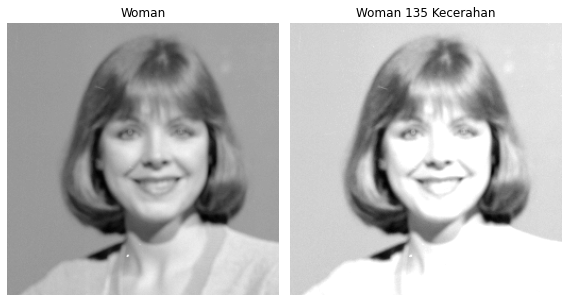

In [2]:
def image_brightening(image, brightness_val):
    image_copy = image.copy()
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
            temp = image_copy[row, column] + brightness_val
            
            if temp < 0:
                image_copy[row, column] = 0
            elif temp > 255:
                image_copy[row, column] = 255
            else:
                image_copy[row, column] = temp
                
    return image_copy

woman = io.imread("../test_images/woman.gif")
brightening = 135
woman_with_brightening_ench = image_brightening(woman, brightening)

plot_image(woman, woman_with_brightening_ench, "Woman", f"Woman {brightening} Kecerahan")

## Menegatifkan Citra

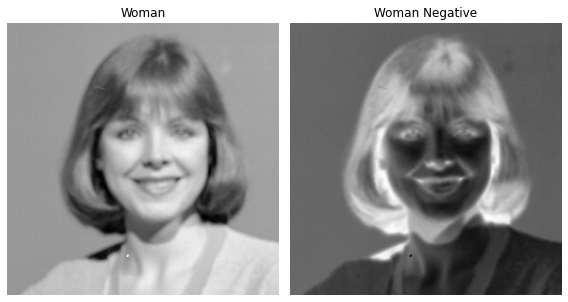

In [3]:
def image_negative(image):
    image_copy = image.copy()
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
            image_copy[row, column] = 255 - image_copy[row, column]
            
    return image_copy

woman = io.imread("../test_images/woman.gif")
woman_with_negative_ench = image_negative(woman)

plot_image(woman, woman_with_negative_ench, "Woman", f"Woman Negative")

## Transformasi Log

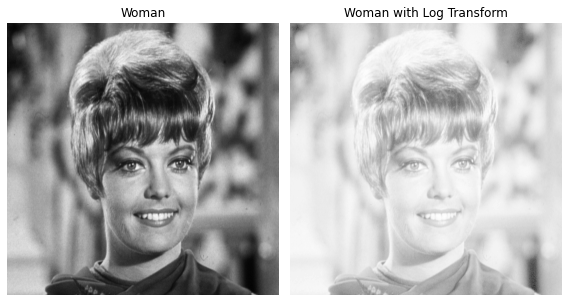

In [4]:
def log_transform(image, constant):
    image_copy = image.copy()
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
            image_copy[row, column] = constant * np.log10(1 + image_copy[row, column])
            
    return image_copy

zelda_gray = io.imread("../test_images/zelda_gray.bmp")
zelda_gray_with_log_transform = log_transform(zelda_gray, 100)

plot_image(zelda_gray, zelda_gray_with_log_transform, "Woman", f"Woman with Log Transform")

## Transformasi Log Balikan

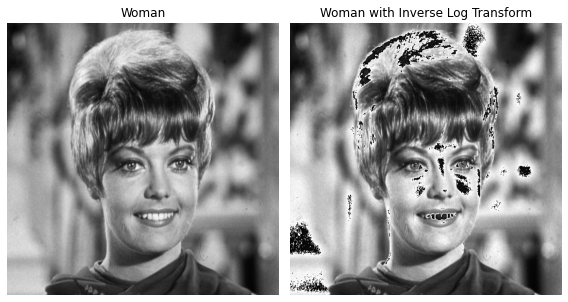

In [5]:
def inv_log_transform(image, constant):
    image_copy = image.copy()
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
            image_copy[row, column] = np.power(10, constant * np.log10(1 + image_copy[row, column]))
            
    return image_copy

zelda_gray = io.imread("../test_images/zelda_gray.bmp")
zelda_gray_with_inv_log_transform = inv_log_transform(zelda_gray, 1.1)

plot_image(zelda_gray, zelda_gray_with_inv_log_transform, "Woman", f"Woman with Inverse Log Transform")

## Transformasi Pangkat

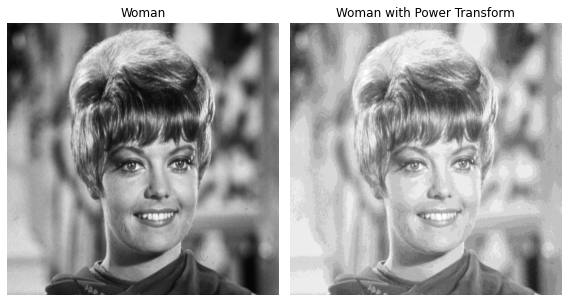

In [6]:
def power_transform(image, constant, power):
    image_copy = image.copy()
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
            image_copy[row, column] = constant * np.power(image_copy[row, column], power)
            
    return image_copy

zelda_gray = io.imread("../test_images/zelda_gray.bmp")
zelda_gray_with_power_transform = power_transform(zelda_gray, 1, 0.5)

plot_image(zelda_gray, zelda_gray_with_power_transform, "Woman", f"Woman with Power Transform")

## Koreksi Gamma

C:\Users\62821\AppData\Local\Temp\ipykernel_13040\2213709357.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  image_copy[row, column] = constant * (1 / np.power(image_copy[row, column], power))


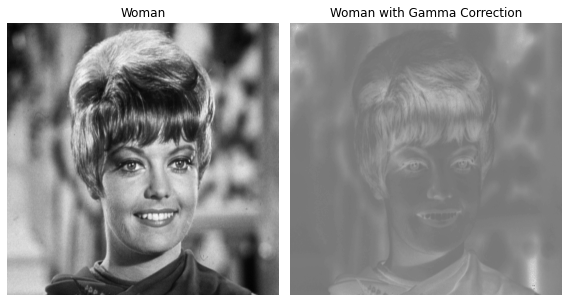

In [7]:
def gamma_correction(image, constant, power):
    image_copy = image.copy()
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
            image_copy[row, column] = constant * (1 / np.power(image_copy[row, column], power))
            
    return image_copy

zelda_gray = io.imread("../test_images/zelda_gray.bmp")
zelda_gray_with_gamma_correction = gamma_correction(zelda_gray, 100, 0.15)

plot_image(zelda_gray, zelda_gray_with_gamma_correction, "Woman", f"Woman with Gamma Correction")

## Peregangan Kontras 1

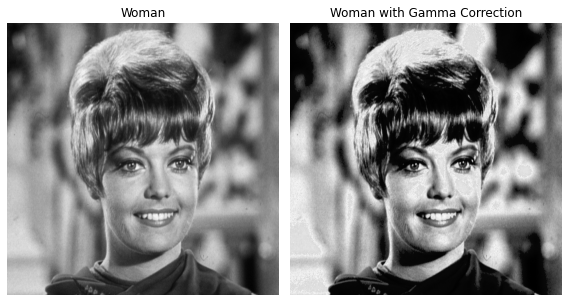

In [8]:
def constrast_stretching(image, a=50, b=150, gamma=2, beta=1):
    image_copy = image.copy()

    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
            if 0 <= image_copy[row, column] < a:
                image_copy[row, column] = 0.2 * image_copy[row, column]
            elif a <= image_copy[row, column] < b:
                image_copy[row, column] = gamma * (image_copy[row, column] - a) + 30
            else:
                image_copy[row, column] = beta * (image_copy[row, column] - b) + 200   
                
    return image_copy

zelda_gray = io.imread("../test_images/zelda_gray.bmp")
zelda_gray_with_constrast_stretching = constrast_stretching(zelda_gray)

plot_image(zelda_gray, zelda_gray_with_constrast_stretching, "Woman", f"Woman with Gamma Correction")

## Peregangan Kontras 2

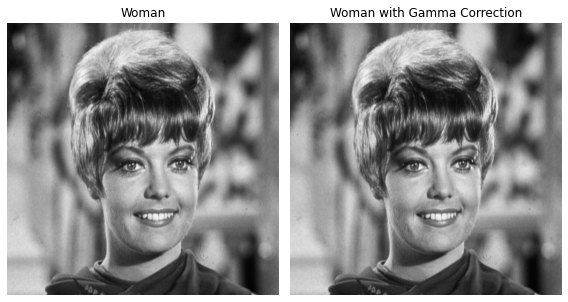

In [9]:
def constrast_stretching(image):
    image_copy = image.copy()
    rmin = image_copy.ravel().min()
    rmax = image_copy.ravel().max()
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
            image_copy[row, column] = (image_copy[row, column] - rmin) * (255 / (rmax - rmin))
                
    return image_copy

zelda_gray = io.imread("../test_images/zelda_gray.bmp")
zelda_gray_with_constrast_stretching = constrast_stretching(zelda_gray)

plot_image(zelda_gray, zelda_gray_with_constrast_stretching, "Woman", f"Woman with Gamma Correction")

## Peregangan Kontras 3

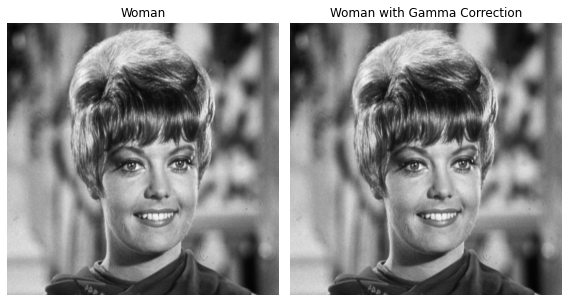

In [10]:
def constrast_stretching(image):
    image_copy = image.copy()
    rmin = image_copy.ravel().min()
    rmax = image_copy.ravel().max()
    m = 255 / (rmax - rmin)
    c = 255 - m * rmax
    
    for row in range(image_copy.shape[0]):
        for column in range(image_copy.shape[1]):
            image_copy[row, column] = m * image_copy[row, column] + c
                
    return image_copy

zelda_gray = io.imread("../test_images/zelda_gray.bmp")
zelda_gray_with_constrast_stretching = constrast_stretching(zelda_gray)

plot_image(zelda_gray, zelda_gray_with_constrast_stretching, "Woman", f"Woman with Gamma Correction")

## Bit Plane Slicing

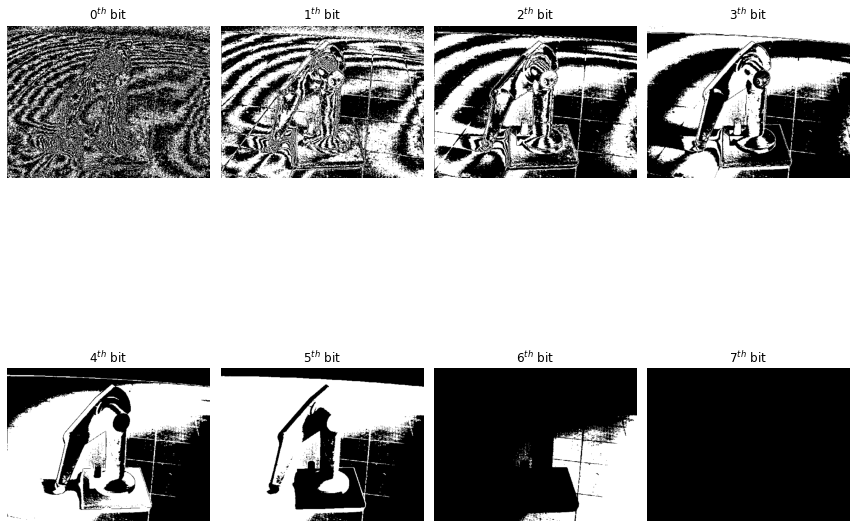

In [11]:
def repr_image_in_bit(image):
    image_in_bit = np.zeros((image.shape[0], image.shape[1]), dtype=np.object0)
    
    for row in range(image.shape[0]):
        for column in range(image.shape[1]):
            image_in_bit[row,column] = np.binary_repr(image[row, column], 8)
            
    return image_in_bit

def compose_bit(image_in_bit, bit_position):
    bit = np.zeros((image_in_bit.shape[0], image_in_bit.shape[1]), dtype=np.ubyte)

    for i in range(image_in_bit.shape[0]):
        for j in range(image_in_bit.shape[1]):
            bit[i, j] = image_in_bit[i, j][bit_position]
    
    return bit

def get_each_image_bit(image, func_repr_image_in_bit, func_compose_bit, bit_position):
    if 0 > bit_position > 7:
        raise ValueError("Bit position must be 0-7.")
    
    img_in_bit = func_repr_image_in_bit(image)
    bit = func_compose_bit(img_in_bit, bit_position)
    
    return bit

raw_image = plt.imread("../test_images/robot_hand.bmp", "bmp")
first_bit = get_each_image_bit(raw_image, repr_image_in_bit, compose_bit, 7)
second_bit = get_each_image_bit(raw_image, repr_image_in_bit, compose_bit, 6)
third_bit = get_each_image_bit(raw_image, repr_image_in_bit, compose_bit, 5)
fourth_bit = get_each_image_bit(raw_image, repr_image_in_bit, compose_bit, 4)
fifth_bit = get_each_image_bit(raw_image, repr_image_in_bit, compose_bit, 3)
sixth_bit = get_each_image_bit(raw_image, repr_image_in_bit, compose_bit, 2)
seventh_bit = get_each_image_bit(raw_image, repr_image_in_bit, compose_bit, 1)
eighth_bit = get_each_image_bit(raw_image, repr_image_in_bit, compose_bit, 0)

fig, ax = plt.subplots(nrows=2, ncols=4, tight_layout=True, figsize=(12, 12))

ax[0, 0].set_title("${0^{th}}$ bit")
ax[0, 0].axis("off")
ax[0, 0].imshow(first_bit, plt.cm.gray)

ax[0, 1].set_title("${1^{th}}$ bit")
ax[0, 1].axis("off")
ax[0, 1].imshow(second_bit, plt.cm.gray)

ax[0, 2].set_title("${2^{th}}$ bit")
ax[0, 2].axis("off")
ax[0, 2].imshow(third_bit, plt.cm.gray)

ax[0, 3].set_title("${3^{th}}$ bit")
ax[0, 3].axis("off")
ax[0, 3].imshow(fourth_bit, plt.cm.gray)

ax[1, 0].set_title("${4^{th}}$ bit")
ax[1, 0].axis("off")
ax[1, 0].imshow(fifth_bit, plt.cm.gray)

ax[1, 1].set_title("${5^{th}}$ bit")
ax[1, 1].axis("off")
ax[1, 1].imshow(sixth_bit, plt.cm.gray)

ax[1, 2].set_title("${6^{th}}$ bit")
ax[1, 2].axis("off")
ax[1, 2].imshow(seventh_bit, plt.cm.gray)

ax[1, 3].set_title("${7^{th}}$ bit")
ax[1, 3].axis("off")
ax[1, 3].imshow(eighth_bit, plt.cm.gray);